In [5]:
# Sure, let's break down the variables in text format:

# 1. prior: The prior value represents the combined influence of the average degree (`avg_deg`) of the nodes in the graph and the betweenness centrality (`bet_cen`) measure of a specific node. It's calculated by summing the average degree with the betweenness centrality of the node.

# 2. xam: This variable computes the remainder when the degree of a node (`deg`) is divided by the `prior` value. In other words, it quantifies how much the degree of the node deviates from its calculated prior influence.

# 3. xcuse: The `xcuse` value is a ratio that expresses the proportion of the `prior` value relative to the sum of the `prior` and the degree of the node. It signifies how much the prior influence contributes to the overall influence of the node.

# The `priority_score` is then determined by adding `xam` and `xcuse` together. This scoring mechanism aims to combine both the relative deviation of the node's degree from its expected influence (`xam`) and the contribution of its prior influence to its overall importance (`xcuse`).

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/student/an

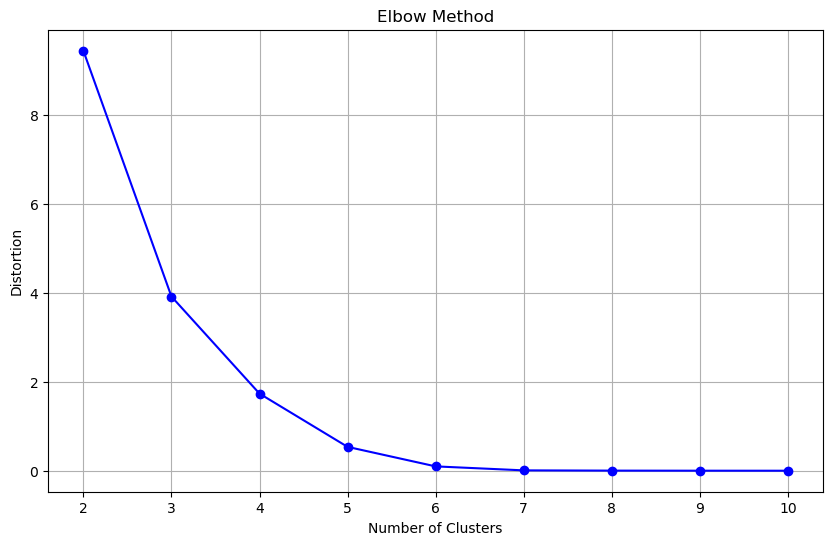

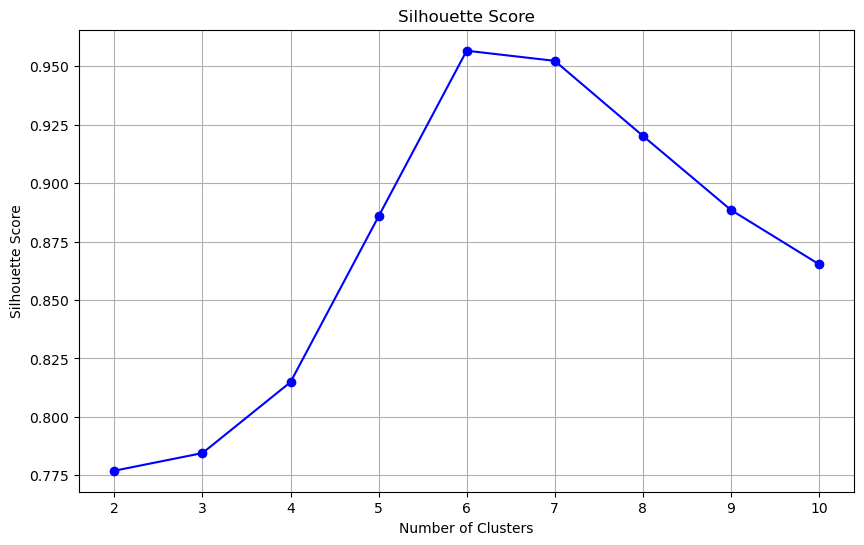

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/student/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


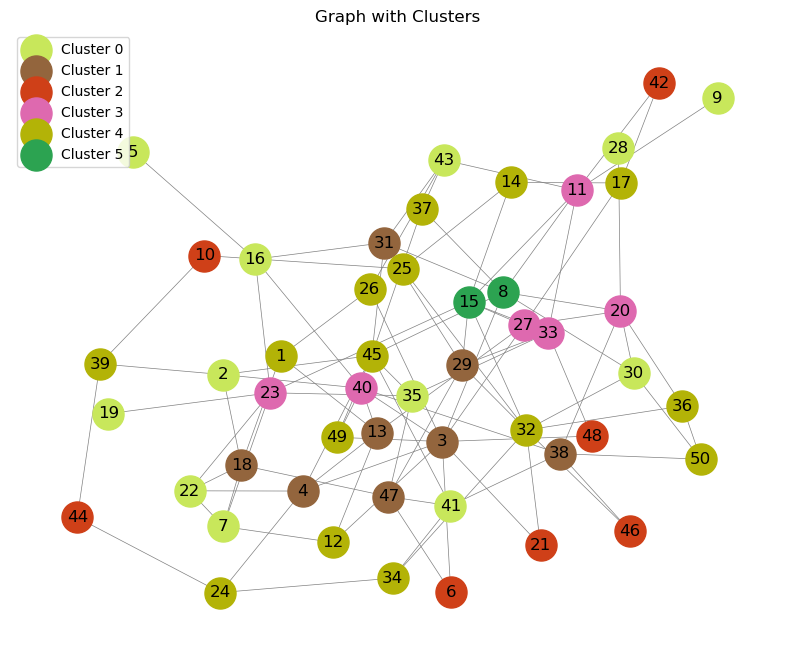

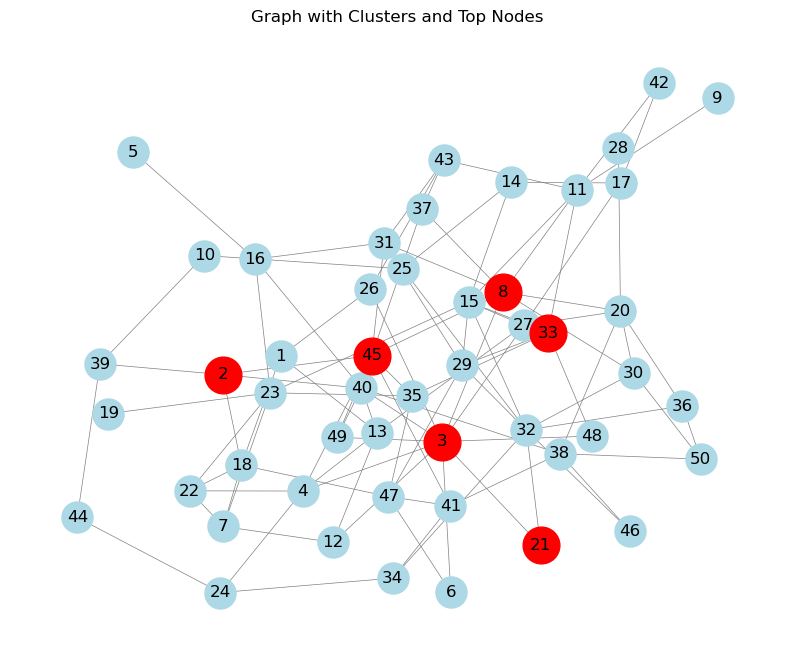

Priority Scores:
Cluster 0:
Node: 2, Priority Score: 6.016739384245762
Node: 16, Priority Score: 6.014303682782637
Node: 41, Priority Score: 6.007861006505777
Node: 35, Priority Score: 6.006501305879494
Node: 30, Priority Score: 6.006271427221682
Node: 43, Priority Score: 6.004801637917072
Node: 22, Priority Score: 6.004263089164237
Node: 7, Priority Score: 6.003145246193716
Node: 9, Priority Score: 6.0
Node: 5, Priority Score: 6.0
Node: 28, Priority Score: 6.0
Node: 19, Priority Score: 6.0

Cluster 1:
Node: 3, Priority Score: 3.0827941434510318
Node: 18, Priority Score: 2.7707531584062197
Node: 47, Priority Score: 2.768637026239067
Node: 29, Priority Score: 2.7667597991577586
Node: 13, Priority Score: 2.766108951517115
Node: 31, Priority Score: 2.7659207968901844
Node: 38, Priority Score: 2.7560614404491957
Node: 4, Priority Score: 2.7461089515171144

Cluster 2:
Node: 21, Priority Score: 5.008138969873664
Node: 10, Priority Score: 5.006038427275673
Node: 6, Priority Score: 5.002622388

In [4]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import math
import csv

# Function to parse input graph data and create a weighted graph
def parse_graph_data(input_data):
    graph = nx.Graph()
    lines = input_data.split('\n')
    for line in lines:
        if line.startswith('Nodes'):
            num_nodes = int(line.split()[1])
        elif line.startswith('E'):
            parts = line.split()
            if len(parts) >= 3:
                _, node1, node2 = parts
                graph.add_edge(node1, node2)
    return graph

# Custom scoring function
def calculate_priority_score(graph):
    avg_deg = sum(dict(graph.degree()).values()) / len(graph.nodes())
    bet_cen = nx.betweenness_centrality(graph)
    priority_scores = {}
    for node, deg in dict(graph.degree()).items():
        prior = avg_deg + bet_cen[node]
        xam = deg % prior
        xcuse = (deg + prior) / deg
        priority_score = xcuse + xam
        priority_scores[node] = priority_score
    return priority_scores

# Elbow method for finding optimal number of clusters
def elbow_method(data):
    distortions = []
    silhouette_scores = []
    max_clusters = min(len(data), 10)
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), distortions, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)
    plt.show()

    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='b')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)
    plt.show()

# Perform K-means clustering
def perform_kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    return labels

# Plot graph with clusters
def plot_graph_with_clusters(graph, priority_scores, labels):
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(10, 8))
    
    # Plot nodes
    for label in set(labels):
        node_list = [node for node, cluster_label in zip(priority_scores.keys(), labels) if cluster_label == label]
        nx.draw_networkx_nodes(graph, pos, nodelist=node_list, node_color=np.random.rand(3,), node_size=500, label=f'Cluster {label}')
    
    # Plot edges
    nx.draw(graph, pos, with_labels=True, node_size=0, edge_color='gray', width=0.5)
    plt.title("Graph with Clusters")
    plt.legend()
    plt.show()

# Plot graph with clusters and top nodes
def plot_graph_with_clusters_and_top_nodes(graph, priority_scores, labels):
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(10, 8))
    
    # Plot nodes based on clusters
    for label in set(labels):
        node_list = [node for node, cluster_label in zip(priority_scores.keys(), labels) if cluster_label == label]
        nx.draw_networkx_nodes(graph, pos, nodelist=node_list, node_color='lightblue', node_size=500)
    
    # Highlight top nodes in each cluster
    for label in set(labels):
        cluster_nodes = [node for node, cluster_label in zip(priority_scores.keys(), labels) if cluster_label == label]
        top_node = max(cluster_nodes, key=lambda x: priority_scores[x])
        nx.draw_networkx_nodes(graph, pos, nodelist=[top_node], node_color='red', node_size=700)
    
    # Plot edges
    nx.draw(graph, pos, with_labels=True, node_size=0, edge_color='gray', width=0.5)
    plt.title("Graph with Clusters and Top Nodes")
    plt.show()

# Write results to a CSV file
def write_results_to_csv(priority_scores, labels):
    with open('influential_nodes_results.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Node', 'Priority Score', 'Cluster'])
        for label in set(labels):
            cluster_nodes = [node for node, cluster_label in zip(priority_scores.keys(), labels) if cluster_label == label]
            sorted_nodes = sorted(cluster_nodes, key=lambda x: priority_scores[x], reverse=True)
            for node in sorted_nodes:
                writer.writerow([node, priority_scores[node], label])

# Main function
if __name__ == "__main__":
    # Input graph data
    input_data = """
       SECTION Graph
Nodes 50
Edges 100
E 1 18
E 2 39
E 2 40
E 2 45
E 3 4
E 3 6
E 3 8
E 3 12
E 3 21
E 3 26
E 3 27
E 3 40
E 3 48
E 3 49
E 4 13
E 4 22
E 4 45
E 7 12
E 7 18
E 8 20
E 8 30
E 8 31
E 8 45
E 10 39
E 11 8
E 11 9
E 11 15
E 11 42
E 11 43
E 13 1
E 13 12
E 13 27
E 13 40
E 15 14
E 15 23
E 15 29
E 15 33
E 16 5
E 16 23
E 16 40
E 17 14
E 17 42
E 18 2
E 18 47
E 20 27
E 20 28
E 20 38
E 21 32
E 22 7
E 22 18
E 23 7
E 23 19
E 23 22
E 23 35
E 24 4
E 24 44
E 25 10
E 25 14
E 26 1
E 27 15
E 27 17
E 27 33
E 29 31
E 30 20
E 31 16
E 31 43
E 31 45
E 32 15
E 32 25
E 32 29
E 32 30
E 32 34
E 32 36
E 32 46
E 33 11
E 33 29
E 33 35
E 34 24
E 35 47
E 36 20
E 36 50
E 37 8
E 37 45
E 38 41
E 38 46
E 39 44
E 40 38
E 40 49
E 41 34
E 41 45
E 43 26
E 43 37
E 45 35
E 45 49
E 47 6
E 47 29
E 47 41
E 48 33
E 50 30
E 50 38
END
    """
    # Parse graph data and construct graph
    graph = parse_graph_data(input_data)
    
    # Calculate priority scores for each node
    priority_scores = calculate_priority_score(graph)
    
    # Apply elbow method to find the optimal number of clusters
    elbow_method(np.array(list(priority_scores.values())).reshape(-1, 1))
    
    # Adjust this based on the elbow method result
    n_clusters = 6
    
    # Perform K-means clustering
    labels = perform_kmeans_clustering(np.array(list(priority_scores.values())).reshape(-1, 1), n_clusters)
    
    # Plot the graph with clusters
    plot_graph_with_clusters(graph, priority_scores, labels)
    plot_graph_with_clusters_and_top_nodes(graph, priority_scores, labels)
    
    # Print the priority_scores
    print("Priority Scores:")
    for label in set(labels):
        print(f"Cluster {label}:")
        cluster_nodes = [node for node, cluster_label in zip(priority_scores.keys(), labels) if cluster_label == label]
        sorted_nodes = sorted(cluster_nodes, key=lambda x: priority_scores[x], reverse=True)
        for node in sorted_nodes:
            print(f"Node: {node}, Priority Score: {priority_scores[node]}")
        print()
    
    # Write results to CSV
    write_results_to_csv(priority_scores, labels)
